<a href="https://colab.research.google.com/github/Polydany0/Digital-Image-Processing/blob/main/Swin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# !pip install --upgrade transformers torch pillow requests matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [1]:
# Явная установка совместимых версий PyTorch и torchvision
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install -U transformers pillow requests matplotlib timm

Looking in indexes: https://download.pytorch.org/whl/cu118


In [8]:
# Импорт библиотек
from transformers import AutoImageProcessor, SwinForImageClassification
import torch
from PIL import Image
import matplotlib.pyplot as plt
from datasets import load_dataset
import numpy as np
import random

In [3]:
# Загрузка предобученной модели и процессора
model = SwinForImageClassification.from_pretrained(
    "microsoft/swin-tiny-patch4-window7-224"
)
image_processor = AutoImageProcessor.from_pretrained(
    "microsoft/swin-tiny-patch4-window7-224"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [16]:
# Дополнительный анализ классов кошачьих в модели
cat_classes = []
for class_id, class_name in model.config.id2label.items():
    # Ищем классы, связанные с кошками (используя ключевые слова)
    if "cat" in class_name.lower() or "tiger" in class_name.lower() or "lion" in class_name.lower():
        cat_classes.append((class_id, class_name))

# Сортируем классы по ID
cat_classes.sort(key=lambda x: x[0])

print("═"*50)
print(f"🔍 Модель может распознавать {len(cat_classes)} классов кошачьих:")
for class_id, class_name in cat_classes:
    print(f"{class_id}: {class_name}")

print("═"*50)

══════════════════════════════════════════════════
🔍 Модель может распознавать 22 классов кошачьих:
3: tiger shark, Galeocerdo cuvieri
30: bullfrog, Rana catesbeiana
89: sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
143: oystercatcher, oyster catcher
150: sea lion
281: tabby, tabby cat
282: tiger cat
283: Persian cat
284: Siamese cat, Siamese
285: Egyptian cat
286: cougar, puma, catamount, mountain lion, painter, panther, Felis concolor
287: lynx, catamount
291: lion, king of beasts, Panthera leo
292: tiger, Panthera tigris
300: tiger beetle
358: polecat, fitch, foulmart, foumart, Mustela putorius
361: skunk, polecat, wood pussy
383: Madagascar cat, ring-tailed lemur, Lemur catta
387: lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens
396: lionfish
484: catamaran
688: oscilloscope, scope, cathode-ray oscilloscope, CRO
══════════════════════════════════════════════════


In [9]:
# Загрузка датасета с кошками
dataset = load_dataset("huggingface/cats-image")
print(f"Датасет загружен: {len(dataset['test'])} изображений")

README.md:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

cats_image.jpeg:   0%|          | 0.00/173k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/1 [00:00<?, ? examples/s]

Датасет загружен: 1 изображений


In [10]:
def process_image(image):
    """Обработка одного изображения и получение предсказания"""
    # Преобразование PIL изображения в RGB
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Предобработка и предсказание
    inputs = image_processor(image, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    # Получение предсказания
    predicted_label_id = logits.argmax(-1).item()
    predicted_label_text = model.config.id2label[predicted_label_id]
    confidence = torch.nn.functional.softmax(logits, dim=1)[0][predicted_label_id].item()

    return predicted_label_text, confidence, image

Обрабатываем 1 случайных изображений кошек...


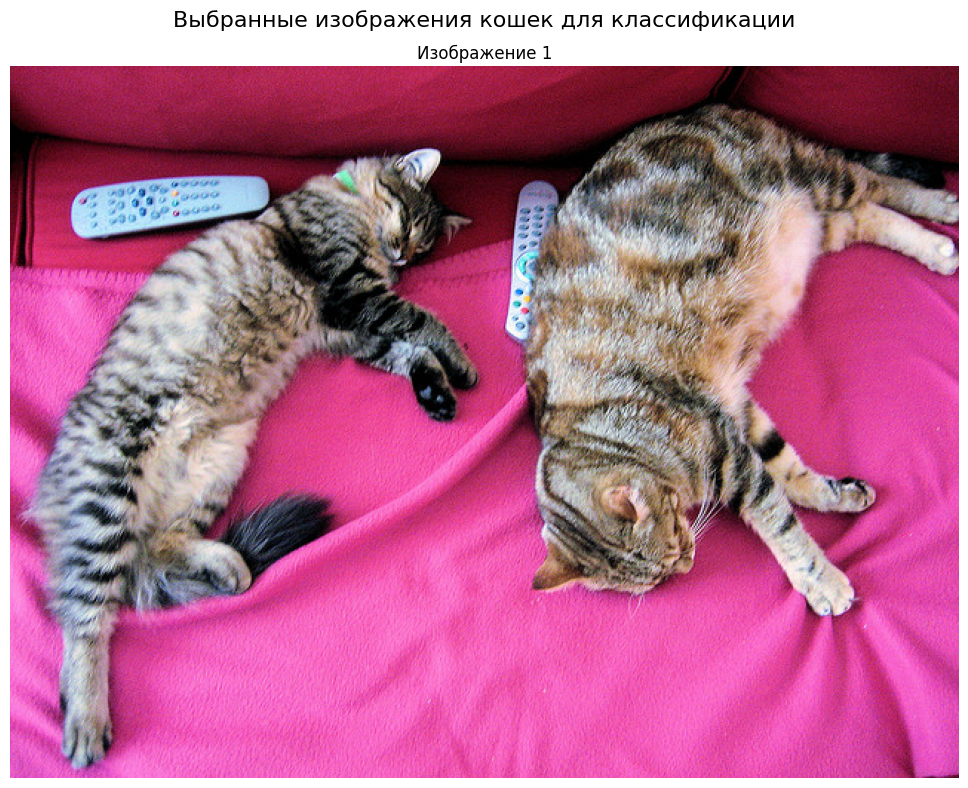

In [13]:
# Выбор случайных изображений из датасета
num_images = 4  # Количество изображений для обработки
selected_indices = random.sample(range(len(dataset['test'])), min(num_images, len(dataset['test'])))
selected_images = [dataset['test'][i]['image'] for i in selected_indices]

print(f"Обрабатываем {len(selected_images)} случайных изображений кошек...")

# Визуализация выбранных изображений перед обработкой
plt.figure(figsize=(15, 8))
plt.suptitle('Выбранные изображения кошек для классификации', fontsize=16)

for i, img in enumerate(selected_images):
    plt.subplot(1, len(selected_images), i+1)
    plt.imshow(img)
    plt.title(f"Изображение {i+1}", fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Обработка изображений
results = []
print("\nНачинаем обработку изображений...")
for i, img in enumerate(selected_images):
    print(f"Обработка изображения {i+1}...")
    label, confidence, processed_img = process_image(img)
    results.append((label, confidence, processed_img))
    print(f"  Предсказание: {label} (Уверенность: {confidence:.2%})")

print("\n✅ Все изображения успешно обработаны!")


Начинаем обработку изображений...
Обработка изображения 1...
  Предсказание: tabby, tabby cat (Уверенность: 37.47%)

✅ Все изображения успешно обработаны!
